# Big Data and Automated Content Analysis I+II, Week 7

(c) Damian Trilling \& Felicia Loecherbach

This notebook illustrates how to determine a cutoff point for logistic regression. Refer to the lecture slides for context.

We use the same data as in week 5 and 6 as starting point (the IMDB data).


In [17]:
from glob import glob
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
np.seterr(divide = 'ignore') 
%matplotlib inline

## Create data set


In [3]:
reviews=[]
test=[]

print("Constructing training dataset")

# glob gives you a list of filenames that match a specific criterion
# in this case, all .txt-files in the postivie training folder

for file in glob ("/Users/felicialoecherbach/Downloads/aclImdb/train/pos/*.txt"):
    with open(file) as fi:
        reviews.append((fi.read(),"1"))
nopostr=len(reviews)

print ("Added",nopostr,"positive reviews")  

for file in glob ("/Users/felicialoecherbach/Downloads/aclImdb/train/neg/*.txt"):
    with open(file) as fi:
        reviews.append((fi.read(),"-1"))
nonegtr=len(reviews)-nopostr
print ("Added",nonegtr,"negative reviews")  
   
print("Constructing test dataset")

for file in glob ("/Users/felicialoecherbach/Downloads/aclImdb/test/pos/*.txt"):
    with open(file) as fi:
        test.append((fi.read(),"1"))
noposte=len(test)
print ("Added",noposte,"positive reviews")  

for file in glob ("/Users/felicialoecherbach/Downloads/aclImdb/test/neg/*.txt"):
    with open(file) as fi:
        test.append((fi.read(),"-1"))
nonegte=len(test)-noposte
print ("Added",nonegte,"negative reviews")  

Constructing training dataset
Added 12500 positive reviews
Added 12500 negative reviews
Constructing test dataset
Added 12500 positive reviews
Added 12500 negative reviews


## Fit vectorizer and model


In [10]:
# Generate BOW representation of word counts
vectorizer = CountVectorizer(stop_words='english')   
#alternatively, you could provide a list of stop words yourself
train_features = vectorizer.fit_transform([r[0] for r in reviews])
test_features = vectorizer.transform([r[0] for r in test])

# Fit a naive bayes model to the training data.
clf = LogisticRegression(max_iter =200)
clf.fit(train_features, [r[1] for r in reviews])


LogisticRegression(max_iter=200)

## Get predictions from default model


In [11]:
predictions = clf.predict(test_features)
actual=[r[1] for r in test]

In [12]:
print('Precision:')
print(metrics.precision_score(actual,predictions,pos_label='1', labels = ['-1','1']))
print('Recall:')
print(metrics.recall_score(actual,predictions,pos_label='1', labels = ['-1','1']))


Precision:
0.8655037495924356
Recall:
0.84944


In [13]:
# another way of doint it
print(metrics.classification_report(actual, predictions))

              precision    recall  f1-score   support

          -1       0.85      0.87      0.86     12500
           1       0.87      0.85      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



Let's also get the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix#Table_of_confusion) (a crosstab of predicted and actual values). Indeed, we see that thinking a good movie is bad is a bit less of a problem than the other way around. But it actually looks kind of balanced already.


In [14]:
print(metrics.confusion_matrix(actual,predictions))

[[10850  1650]
 [ 1882 10618]]


## Get predicted probabilites and plot an ROC curve


In [18]:
predprobs = clf.predict_log_proba(test_features)

In [19]:
predprobs

array([[-1.87536879, -0.16640697],
       [-0.99980299, -0.45878982],
       [-2.50872286, -0.08487413],
       ...,
       [-0.30717359, -1.33000064],
       [-0.14307518, -2.01506985],
       [-0.25955691, -1.47575224]])

In [20]:
fpr,tpr, thresholds = metrics.roc_curve([r[1] for r in test], predprobs[:,1], pos_label='1')
roc_auc = metrics.auc(fpr,tpr)
print("ROC AUC: {}".format(roc_auc))

ROC AUC: 0.9294412287999999


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


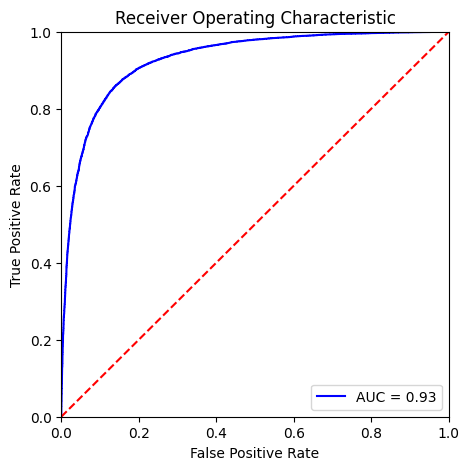

In [21]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig('roccurve.svg')
plt.savefig('roccurve.eps')
plt.show()

### Finding the threshold value: the eyeballing method

The plot shows that TPR of approx .85 might be good. We could check by printing the corresponding threshold value to each false-positive-rate/true-positive-rate combination and then spotting the appropriate threshold:


In [29]:
# DO NOT (NOT, NOT, NOT) PRINT ALL OF THIS IN ANY FINAL ASSIGNMENT....
# RATHER CONSTRUCT A SMART FILTER THAT PRINTS ONLY PARTS OF IT
for f, t, th in zip(fpr,tpr, thresholds):
    if 0.84 < t < 0.86:
        print('{}\t{}\t{}'.format(f,t,th))

0.12344	0.84032	-0.622726273921473
0.1236	0.84032	-0.6231144311552267
0.1236	0.84048	-0.6239185519263694
0.12368	0.84048	-0.6239466387145585
0.12368	0.84056	-0.6239961400715718
0.12376	0.84056	-0.6241963415135393
0.12376	0.84064	-0.6242874196175282
0.12384	0.84064	-0.624968906878222
0.12384	0.8408	-0.6251068663751594
0.124	0.8408	-0.6254393802454827
0.124	0.84096	-0.6266466283084337
0.12408	0.84096	-0.6269951624513647
0.12408	0.84104	-0.6272893024722945
0.12416	0.84104	-0.6273192609372982
0.12416	0.84112	-0.6274212296406154
0.12424	0.84112	-0.6276534455000106
0.12424	0.84128	-0.6278367139689002
0.12432	0.84128	-0.6279556708720656
0.12432	0.84144	-0.6284604865603608
0.1244	0.84144	-0.6286854946073678
0.1244	0.84152	-0.6286864888672133
0.12448	0.84152	-0.6289607366002172
0.12448	0.84168	-0.6294037928838384
0.12456	0.84168	-0.6297880110540511
0.12456	0.84192	-0.6303329283511447
0.12488	0.84192	-0.6311850096305651
0.12488	0.842	-0.631631108501419
0.12496	0.842	-0.6334427732056328
0.12496	0

Looks like it's something around -0.7. That would be a FPR of 13% and a TPR of 85%.
Wait, -0,7? What does that mean? We need to exponentiate:


In [30]:
np.exp(-0.7)

0.4965853037914095

This looks very close to our default cutoff of 0.5 (and that makes sense, given our confusion matrix above).
Let's check the other way round:


In [31]:
np.log(0.5)

-0.6931471805599453

### Finding the threshold value: finding the maximum differnence between TPR and FPR

Rather than staring at this large table, we could also try to maximize the difference between TPR and FPR and look up which threshold belongs to it. In other words: we find the row in the table above with the biggest difference between the first two columns and print the value in the third column.


In [32]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

-0.7595495130451105


This approach is also known as Youden's J. An alternative implementation without using `numpy` could be:


In [34]:
def get_optimal_threshold(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]    # return threshold score of the last (i.e., highest j_score)_ot

optimal_threshold2 = get_optimal_threshold(fpr,tpr,thresholds)
print(optimal_threshold)

-0.7595495130451105


In [35]:
np.exp(optimal_threshold)

0.4678771520954043

Looks like we can go even a bit lower with our threshold than we expected. Let's try:


In [36]:
predictions_new = np.where(predprobs[:,1] > optimal_threshold, '1', '-1')

In [40]:
print('WITH THRESHOLD OF {}'.format(np.exp(optimal_threshold)))
print('-'*60)
print(metrics.confusion_matrix(actual,predictions_new))
print("PRECISION:", metrics.precision_score(actual, predictions_new, pos_label='1'))
print("RECALL:", metrics.recall_score(actual,predictions_new, pos_label='1'))

WITH THRESHOLD OF 0.4678771520954043
------------------------------------------------------------
[[10763  1737]
 [ 1767 10733]]
PRECISION: 0.8607056936647955
RECALL: 0.85864


In [41]:
print('WITH THRESHOLD OF .50')
print('-'*60)
print(metrics.confusion_matrix(actual,predictions))
print("PRECISION:", metrics.precision_score(actual, predictions, pos_label='1'))
print("RECALL:", metrics.recall_score(actual,predictions, pos_label='1'))

WITH THRESHOLD OF .50
------------------------------------------------------------
[[10850  1650]
 [ 1882 10618]]
PRECISION: 0.8655037495924356
RECALL: 0.84944


Yeah! Looks like we have slightly more balanced predictions now! We got a minimally worse precision but and a minimally better recall.

Using our new cutoff point makes our classifier _equally good in predicting good and bad movies_, which was not the case before.
